In [1]:
import pandas as pd
data = pd.read_csv('/Users/cdonnat/Downloads/market_basket/hh_demographic.csv')
data.head()

,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,household_key
0,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,1
1,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,7
2,25-34,U,25-34K,Unknown,2 Adults Kids,3,1,8
3,25-34,U,75-99K,Homeowner,2 Adults Kids,4,2,13
4,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown,16


In [2]:
import pandas as pd
transac = pd.read_csv('/Users/cdonnat/Downloads/market_basket/transaction_data.csv')
transac.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0.0,0.0
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0.0,0.0
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0.0,0.0
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0.0,0.0
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0.0,0.0


In [3]:
### select household of interest

In [4]:
counts = transac.groupby(['household_key'])['DAY'].nunique().reset_index()

In [8]:
counts

,household_key,DAY
0,1,79
1,2,45
2,3,46
3,4,30
4,5,33
...,...,...
2495,2496,49
2496,2497,193
2497,2498,150
2498,2499,81


In [6]:
import matplotlib.pyplot as plt

(array([986., 717., 407., 193., 104.,  49.,  16.,  18.,   6.,   4.]),
 array([  1.,  53., 105., 157., 209., 261., 313., 365., 417., 469., 521.]),
 <BarContainer object of 10 artists>)

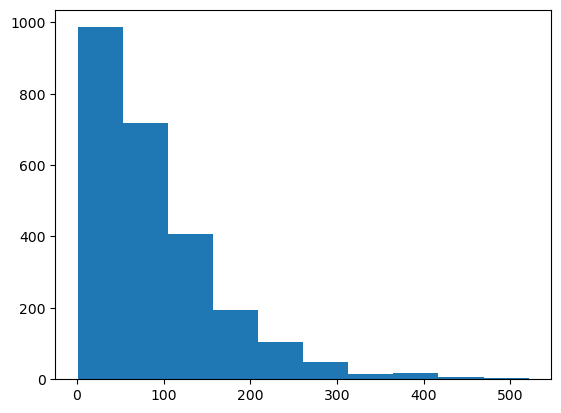

In [9]:
plt.hist(counts['DAY'])
### Keep the households that have more than 50 days


In [14]:
import numpy as np
np.sum(counts['DAY']>200)

217

In [15]:
households = counts['household_key'][counts['DAY']>200]

In [16]:
households

5          6
12        13
18        19
19        20
26        27
        ... 
2411    2412
2426    2427
2448    2449
2458    2459
2466    2467
Name: household_key, Length: 217, dtype: int64

In [ ]:
transac_